In [25]:
import pandas as pd

In [5]:
df = pd.read_csv("linkedin_jobs.csv")

In [7]:
df.sample(6)

,ID,DATA,TITULO,EMPRESA,LOCAL,LINK,DESCRICAO
75,gerente-de-marketing-e-comunica%C3%A7%C3%A3o-c...,2023-07-11,Gerente de Marketing e Comunicação | Comunicaç...,G4 Educação,"São Paulo, SP",https://br.linkedin.com/jobs/view/gerente-de-m...,"Somos o G4 Educação, somos A Evolução da Escol..."
109,chief-technology-officer-gt-school-remote-%248...,2023-07-11,"Chief Technology Officer, gt.school (Remote) -...",Crossover,"Brasília, DF",https://br.linkedin.com/jobs/view/chief-techno...,Crossover is the world's #1 source of full-tim...
0,lighthouse-programa-de-forma%C3%A7%C3%A3o-em-d...,2023-07-11,Lighthouse - Programa de formação em dados (Re...,Indicium,"Florianópolis, SC",https://br.linkedin.com/jobs/view/lighthouse-p...,O Lighthouse é um programa da Indicium para es...
331,analytical-roles-%E2%80%93-analyst-senior-anal...,2023-07-11,Analytical roles – Analyst/ Senior Analyst/ As...,Agoda,"Belo Horizonte, MG",https://br.linkedin.com/jobs/view/analytical-r...,About Agoda\n\nAgoda is an online travel booki...
128,analista-de-produtos-de-dados-s%C3%AAnior-at-c...,2023-07-11,Analista de Produtos de Dados Sênior,Cielo,"Barueri, SP",https://br.linkedin.com/jobs/view/analista-de-...,Job Description\n\nSe você gosta de possibilid...
209,researcher-pesquisa-e-arquitetura-8014-at-seni...,2023-07-11,Researcher (Pesquisa e Arquitetura) - 8014,Senior Sistemas,"Blumenau, SC",https://br.linkedin.com/jobs/view/researcher-p...,A gente ama tecnologia e buscamos impulsionar ...


## EDA

Vamos analisar os dados coletados pelo webscraper a partir da pesquisa booleana **("(data science)" OR "cientista de dados)" OR "machine learning")** e obter alguns insights da base de dados.

Para as colunas, possuímos as seguintes entradas:

- ID: ID único para cada vaga específica
- DATA: Data em que a vaga foi scrapada
- TITULO: Título da posição
- EMPRESA: Empresa que está oferencendo a vaga.
- LOCAL: Local onde a vaga foi anunciado.
- LINK: Link para aplicar na vaga.
- DESCRICAO: Descrição da vaga.

Vamos analisar agora informações basicas do dataframe, como shape, tipos de variáveis e valores nulos:

### Informações básicas


In [8]:
# Get the shape of the DataFrame
shape = df.shape

# Get the info of the DataFrame
info = df.info()

# Get the number of null values in each column
null_values = df.isnull().sum()

shape, info, null_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         411 non-null    object
 1   DATA       411 non-null    object
 2   TITULO     411 non-null    object
 3   EMPRESA    411 non-null    object
 4   LOCAL      411 non-null    object
 5   LINK       411 non-null    object
 6   DESCRICAO  411 non-null    object
dtypes: object(7)
memory usage: 22.6+ KB


((411, 7),
 None,
 ID           0
 DATA         0
 TITULO       0
 EMPRESA      0
 LOCAL        0
 LINK         0
 DESCRICAO    0
 dtype: int64)

**Shape**: O dataset possui 411 entradas (linhas) e 7 colunas.

**Tipos das Colunas:** Todas as colunas são string.

**Missing values:** Não há valores faltantes no dataset.


### Estatística Descritiva


Agora, vamos focar na estatistica descritiva. Como todas as colunas são categoricas, a estatística descritiva vai contar com a contagem de valores unicos, valores mais frequentes, e a frequencia do valor mais frequente em cada coluna

In [9]:
# Get descriptive statistics for each column
desc_stats = df.describe(include='all')
desc_stats

,ID,DATA,TITULO,EMPRESA,LOCAL,LINK,DESCRICAO
count,411,411,411,411,411,411,411
unique,411,1,247,177,40,411,314
top,lighthouse-programa-de-forma%C3%A7%C3%A3o-em-d...,2023-07-11,"Chief Product and Technology Officer, gt.schoo...",Agoda,"São Paulo, SP",https://br.linkedin.com/jobs/view/lighthouse-p...,About Agoda\n\nAgoda is an online travel booki...
freq,1,411,12,72,128,1,11


Pode-se concluir que:

- ID: Existem 411 IDs únicos, que implicam que cada vaga possui um ID único.
- DATA: Todas as vagas foram scrapadas no dia "2023-07-11".
- TITULO: Há 247 títulos únicos de vagas. O título que mais aparece é "Chief Product and Technology Officer, gt.school" que aparece 12 vezes.
- EMPRESA: Há 177 empresas únicas. A empresa mais frequente é "Agoda" com 72 vagas.
- LOCAL: Há 40 locais únicos. A localização mais frequenteé "São Paulo, SP" com 128 vagas.
- LINK: Cada vaga possui um link único.
- DESCRICAO: Há 314 descrições únicas. A descrição mais frequente é sobre "Agoda" que aparece 11 vezes.

### Visualização dos Dados

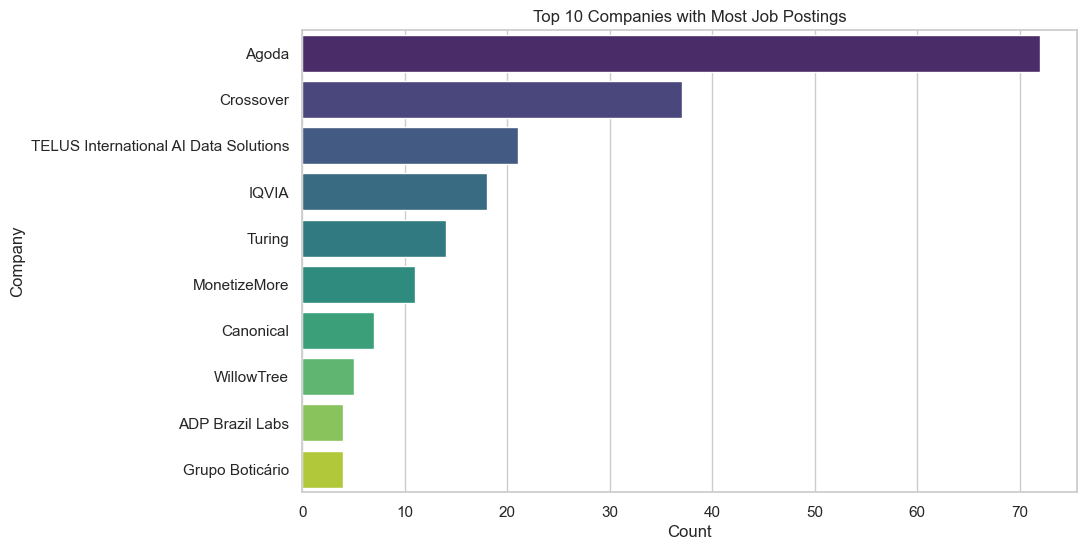

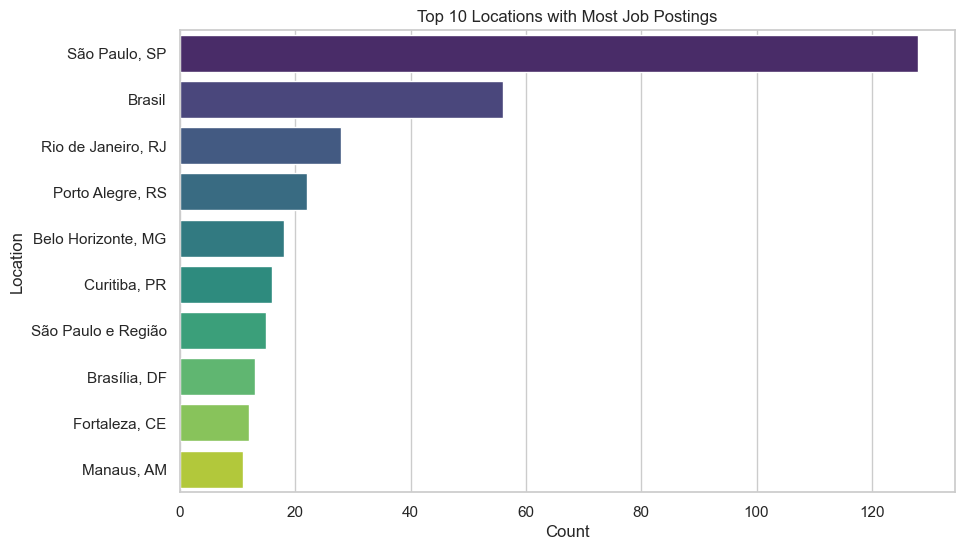

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot the top 10 companies with the most job postings
plt.figure(figsize=(10,6))
sns.countplot(y="EMPRESA", data=df, order=df['EMPRESA'].value_counts().iloc[:10].index, palette="viridis")
plt.title('Top 10 Companies with Most Job Postings')
plt.xlabel('Count')
plt.ylabel('Company')
plt.show()

# Plot the top 10 locations with the most job postings
plt.figure(figsize=(10,6))
sns.countplot(y="LOCAL", data=df, order=df['LOCAL'].value_counts().iloc[:10].index, palette="viridis")
plt.title('Top 10 Locations with Most Job Postings')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()


In [23]:
# Create a new column indicating whether each job description contains the word "remoto"
df['Remoto'] = df['DESCRICAO'].apply(lambda x: 'remoto' in x.lower() or 'remote' in x.lower())

# Count the number of remote jobs
num_remote_jobs = df['Remoto'].sum()

# Get the top 5 companies that offer the most remote jobs
top_remote_companies = df[df['Remoto']]['EMPRESA'].value_counts().head(5)



num_remote_jobs, top_remote_companies

(120,
 Crossover                                37
 TELUS International AI Data Solutions    21
 MonetizeMore                             11
 WillowTree                                5
 TELUS International                       3
 Name: EMPRESA, dtype: int64)

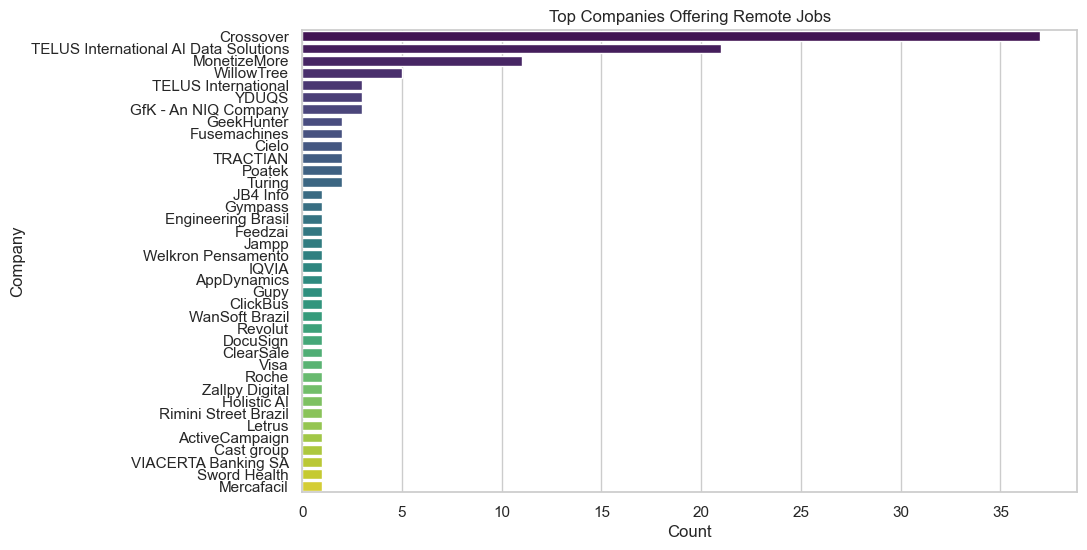

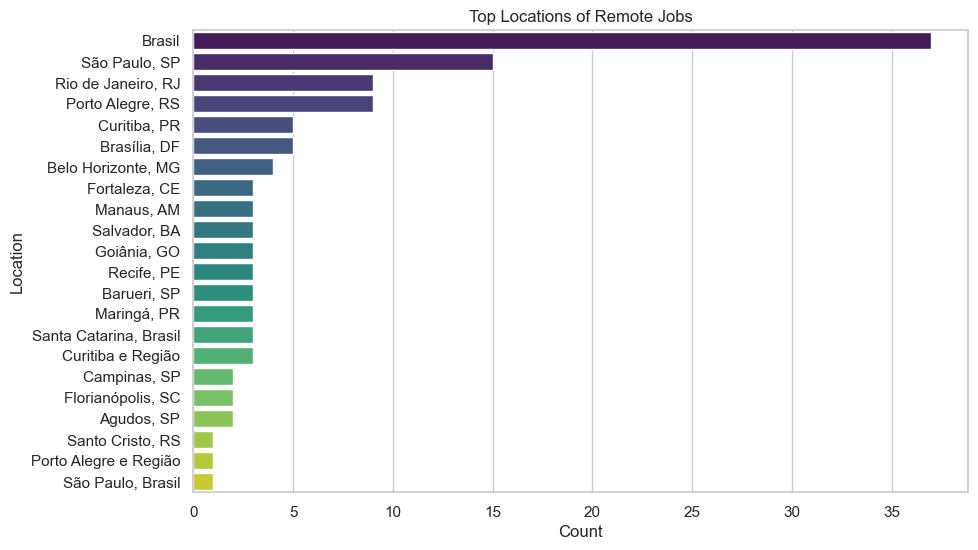

In [24]:
# Plot the top companies that offer remote jobs
plt.figure(figsize=(10,6))
sns.countplot(y="EMPRESA", data=df[df['Remoto']], order=df[df['Remoto']]['EMPRESA'].value_counts().index, palette="viridis")
plt.title('Top Companies Offering Remote Jobs')
plt.xlabel('Count')
plt.ylabel('Company')
plt.show()

# Plot the top locations where remote jobs are offered
plt.figure(figsize=(10,6))
sns.countplot(y="LOCAL", data=df[df['Remoto']], order=df[df['Remoto']]['LOCAL'].value_counts().index, palette="viridis")
plt.title('Top Locations of Remote Jobs')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()


**Número de Trabalhos Remotos:** Há 120 postagens de emprego que mencionam "remoto" ou "remote" em suas descrições, sugerindo que eles podem oferecer trabalho remoto.

**Empresas Oferecendo Trabalhos Remotos:** As empresas que mais mencionam "remoto" ou "remote" em suas postagens de emprego são "Crossover", "TELUS International AI Data Solutions", e "MonetizeMore", cada uma com várias postagens.

**Locais dos Trabalhos Remotos:** Os locais com mais postagens de emprego mencionando "remoto" ou "remote" em suas descrições são "Brasil", "São Paulo, SP", e "Rio de Janeiro, RJ".





### Análise textual das colunas "Descrição" e "Titulo"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vitor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


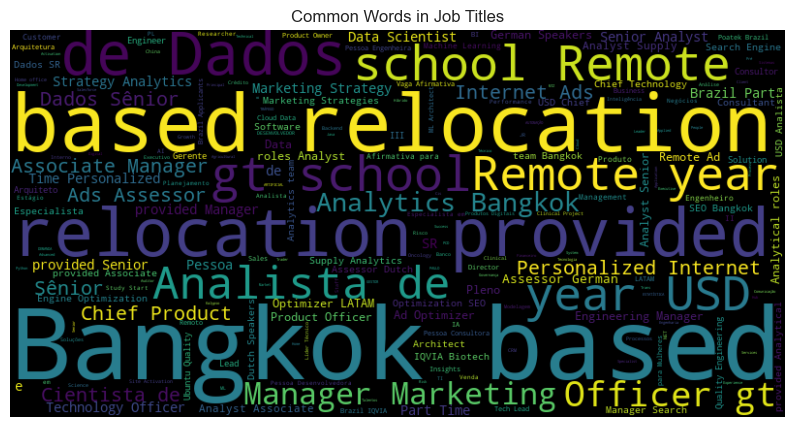

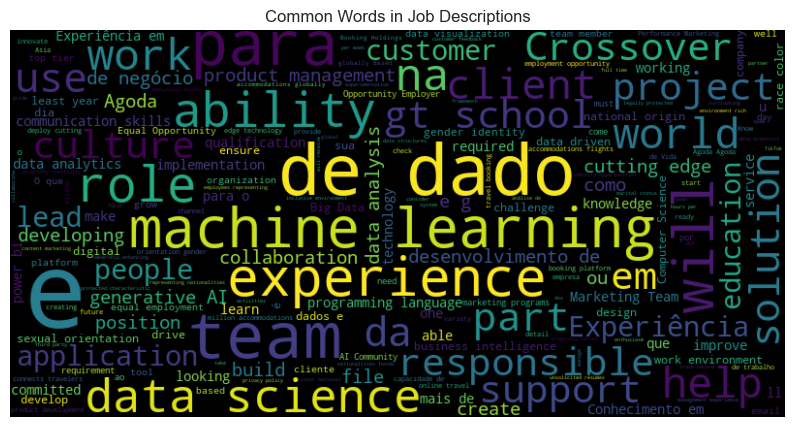

In [20]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# Download Portuguese and English stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_pt = stopwords.words('portuguese')
stop_words_en = stopwords.words('english')

# Combine the stop words in both languages
stop_words = stop_words_pt + stop_words_en

# Create a function to generate a word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title)
    plt.show()

# Combine all job titles into one text and generate a word cloud
all_titles = ' '.join(df['TITULO'])
generate_wordcloud(all_titles, 'Common Words in Job Titles')

# Combine all job descriptions into one text and generate a word cloud
all_descriptions = ' '.join(df['DESCRICAO'])
generate_wordcloud(all_descriptions, 'Common Words in Job Descriptions')

# Create a function to get the most common words in a text
def get_common_words(text, n=10):
    vect = CountVectorizer(stop_words=stop_words).fit(text.split())
    bag_of_words = vect.transform([text])
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the most common words in job titles
common_words_titles = get_common_words(all_titles)

# Get the most common words in job descriptions
common_words_descriptions = get_common_words(all_descriptions)




In [22]:
# Print the common words in job titles
print("Palavras comuns nos títulos das vagas:")
for word, count in common_words_titles:
    print(f"{word}: {count}")

# Print the common words in job descriptions
print("\nPalavras comuns na descrição das vagas:")
for word, count in common_words_descriptions:
    print(f"{word}: {count}")

Palavras comuns nos títulos das vagas:
manager: 99
bangkok: 72
based: 72
relocation: 71
provided: 71
dados: 58
senior: 55
analytics: 54
remote: 51
sênior: 48

Palavras comuns na descrição das vagas:
data: 2031
experience: 1058
team: 1040
work: 910
dados: 865
product: 857
learning: 851
agoda: 809
business: 737
marketing: 722


### Conclusão

**Conjunto de dados:** O conjunto de dados contém 411 postagens de emprego, cada uma com 7 atributos: ID, Data, Título, Empresa, Local, Link e Descrição. Todos os dados são do tipo string e não há valores faltantes.

**Empresas e Locais:** A empresa com mais postagens de emprego é a "Agoda" e o local com mais postagens é "São Paulo, SP".

**Análise de texto:** Os títulos e descrições dos empregos contêm uma mistura de palavras em inglês e português. As palavras mais comuns nos títulos são 'manager', 'bangkok', 'based', 'relocation'. As palavras mais comuns nas descrições são "data", "experience", "team", "work".

**Trabalhos Remotos:** Ao procurar pelas palavras "remoto" e "remote" nas descrições dos empregos, encontramos 120 postagens que possivelmente oferecem trabalho remoto. As empresas que mais oferecem trabalhos remotos são "Crossover", "TELUS International AI Data Solutions", e "MonetizeMore". Os locais com mais postagens de trabalho remoto são "Brasil", "São Paulo, SP", e "Rio de Janeiro, RJ".

